In [131]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
%matplotlib inline

In [132]:
df = pd.read_csv('data/2BW00816_Eng Pri_Training Data.csv', parse_dates=['SS_TimeStamp'], index_col='SS_TimeStamp')
df.head()

,ENG_FUEL_RATE,AIR_FILTER,AMB_AIR_TEMP,ATMOS_PRES,BOOST_PRES,ENG_LOAD,ENG_SPD,LT_EXH_TEMP,RT_EXH_TEMP,RT-LT_EXH_TEMP,THROTTL_POS,TURBO_INLET_PRESSURE,TURBO_OUTLET_PRESSURE,ENGINE_AIR_FILTER_DIFF_PRESS_CV,TURBO_OUT_TO_IN_DIFF_CV
SS_TimeStamp,,,,,,,,,,,,,,,
2014-06-13 17:02:00,337.35,2.5,29.9,99.0,190,100,1523.5,547,551,4,90.0,96.5,288,10.035,191.5
2014-06-13 17:02:00,337.05,2.5,27.6,99.0,190,100,1532.5,545,549,4,90.0,96.5,288,10.035,191.5
2014-06-13 17:02:00,339.35,2.5,24.3,99.0,190,100,1554.5,545,547,2,90.0,96.0,288,12.042,192.0
2014-06-14 11:00:00,321.40,2.0,35.2,98.5,184,100,1327.0,550,557,7,99.6,96.5,282,8.028,185.5
2014-06-14 11:01:00,335.60,2.5,16.5,98.5,202,100,1436.0,559,569,10,99.6,96.0,300,10.035,204.0


In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2928 entries, 2014-06-13 17:02:00 to 2018-10-07 07:45:00
Data columns (total 15 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ENG_FUEL_RATE                    2928 non-null   float64
 1   AIR_FILTER                       2928 non-null   float64
 2   AMB_AIR_TEMP                     2928 non-null   float64
 3   ATMOS_PRES                       2928 non-null   float64
 4   BOOST_PRES                       2928 non-null   int64  
 5   ENG_LOAD                         2928 non-null   int64  
 6   ENG_SPD                          2928 non-null   float64
 7   LT_EXH_TEMP                      2928 non-null   int64  
 8   RT_EXH_TEMP                      2928 non-null   int64  
 9   RT-LT_EXH_TEMP                   2928 non-null   int64  
 10  THROTTL_POS                      2928 non-null   float64
 11  TURBO_INLET_PRESSURE             2928 non-null

In [134]:
df.describe()

,ENG_FUEL_RATE,AIR_FILTER,AMB_AIR_TEMP,ATMOS_PRES,BOOST_PRES,ENG_LOAD,ENG_SPD,LT_EXH_TEMP,RT_EXH_TEMP,RT-LT_EXH_TEMP,THROTTL_POS,TURBO_INLET_PRESSURE,TURBO_OUTLET_PRESSURE,ENGINE_AIR_FILTER_DIFF_PRESS_CV,TURBO_OUT_TO_IN_DIFF_CV
count,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000
mean,279.169518,2.952357,24.450205,99.397541,126.827869,79.382172,1615.458333,464.913251,474.039276,9.126025,88.271721,96.239925,226.241120,12.674671,130.001195
std,76.186905,1.339092,7.942809,0.729758,53.726386,24.892206,179.776141,95.827014,95.094286,20.797398,16.269187,1.541334,53.772737,5.519325,54.657077
min,120.050000,0.000000,1.000000,97.500000,4.000000,4.000000,907.000000,123.000000,126.000000,-33.000000,0.000000,91.500000,104.000000,0.000000,4.500000
25%,226.400000,2.000000,19.100000,99.000000,86.000000,66.000000,1469.500000,403.000000,413.750000,-2.000000,80.300000,95.000000,186.000000,8.028000,88.500000
50%,321.925000,3.000000,24.600000,99.500000,144.000000,91.000000,1626.500000,493.000000,500.000000,3.000000,97.200000,96.000000,244.000000,12.042000,148.000000
75%,337.200000,4.000000,29.400000,100.000000,170.000000,99.000000,1760.500000,540.000000,546.000000,10.000000,99.600000,97.500000,270.000000,16.056000,173.000000
max,352.350000,8.000000,54.000000,102.000000,210.000000,100.000000,1997.000000,616.000000,649.000000,91.000000,99.600000,101.000000,310.000000,30.105000,215.000000


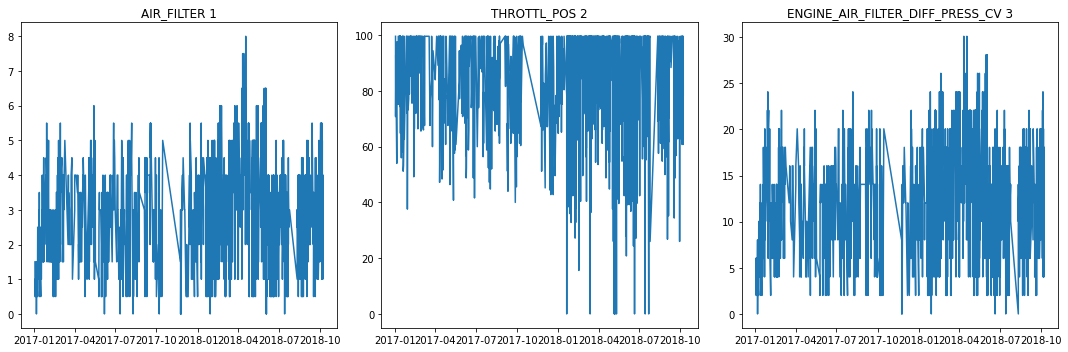

In [135]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))  

axs[0].plot(df['2017-01':]['AIR_FILTER'])  
axs[0].set_title('AIR_FILTER 1')

axs[1].plot(df['2017-01':]['THROTTL_POS'])  
axs[1].set_title('THROTTL_POS 2')

axs[2].plot(df['2017-01':]['ENGINE_AIR_FILTER_DIFF_PRESS_CV'])  
axs[2].set_title('ENGINE_AIR_FILTER_DIFF_PRESS_CV 3')

plt.tight_layout()  
plt.show()


In [136]:
#filling zeroes with interpolation as the data is volatile
df['AIR_FILTER'].replace(0, pd.NA, inplace=True)
df['AIR_FILTER'].interpolate(method='linear', inplace=True)
df['AIR_FILTER'] = df['AIR_FILTER'].fillna(method='bfill')  

In [137]:
df['THROTTL_POS'].replace(0, pd.NA, inplace=True)
df['THROTTL_POS'].interpolate(method='linear', inplace=True)
df['THROTTL_POS'] = df['THROTTL_POS'].fillna(method='bfill')

In [138]:
df['ENGINE_AIR_FILTER_DIFF_PRESS_CV'].replace(0, pd.NA, inplace=True)
df['ENGINE_AIR_FILTER_DIFF_PRESS_CV'].interpolate(method='linear', inplace=True)
df['ENGINE_AIR_FILTER_DIFF_PRESS_CV'] = df['ENGINE_AIR_FILTER_DIFF_PRESS_CV'].fillna(method='bfill')

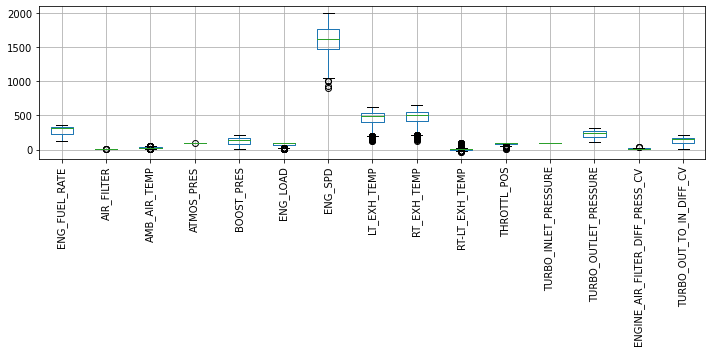

In [139]:
df.boxplot(rot=90, figsize=(10,5))
plt.tight_layout()
plt.show()

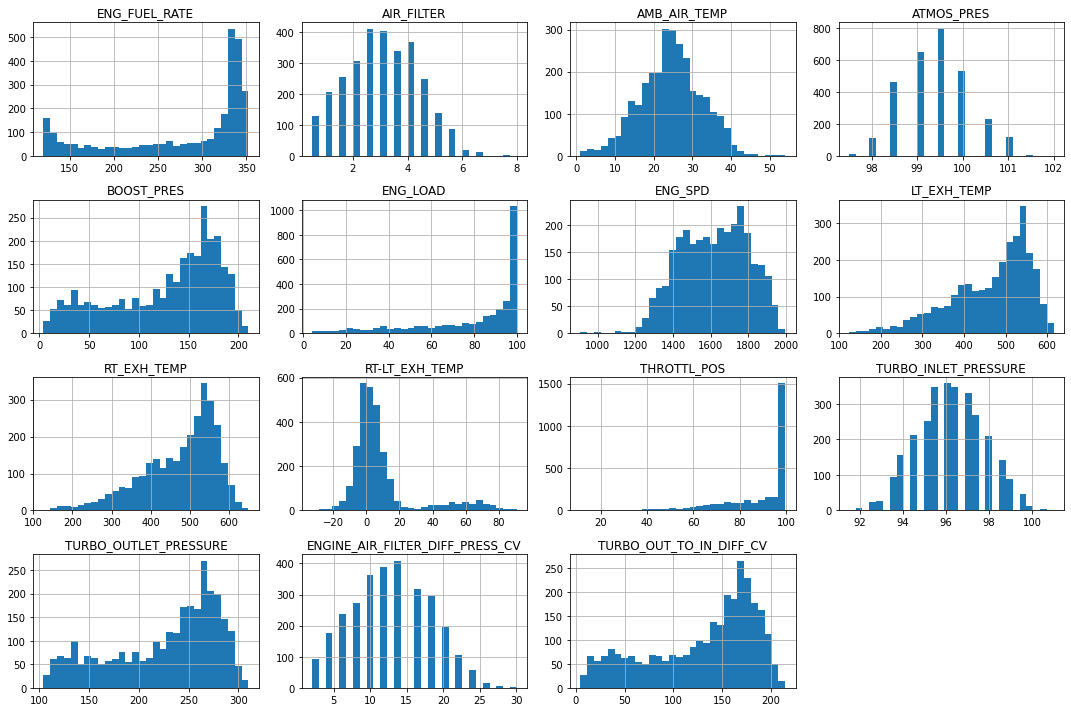

In [140]:
df.hist(bins=30, figsize=(15,10))
plt.tight_layout()
plt.show()

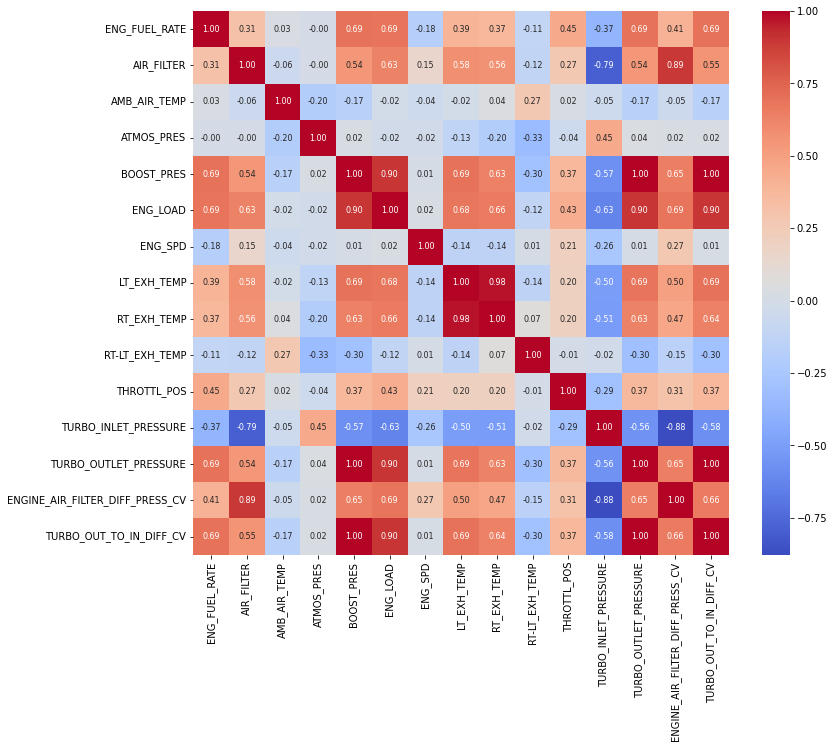

In [141]:
# Correlation Analysis
plt.figure(figsize=(12, 10))  # Increase size of figure
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 8})  # Decrease font size
plt.show()


The Augmented Dickey-Fuller (ADF) test is a type of statistical test called a unit root test. The intuition behind a unit root test is that it determines how strongly a time series is defined by a trend.

The null hypothesis of the ADF test is that the time series has a unit root, meaning it is non-stationary. It has some time-dependent structure.

The alternative hypothesis (rejecting the null hypothesis) is that the time series is stationary.

Null Hypothesis (H0): If accepted, it suggests the time series has a unit root, meaning it is non-stationary. It has some time-dependent structure.
Alternative Hypothesis (H1): The null hypothesis is rejected; it suggests the time series does not have a unit root, meaning it is stationary. It does not have time-dependent structure.
p-value > 0.05: Accepts the null hypothesis (H0), the data has a unit root and is non-stationary.
p-value ≤ 0.05: Rejects the null hypothesis (H0), the data does not have a unit root and is stationary.

In this case, Because the p-value is less than 0.05, I would reject the null hypothesis and can conclude that the time series is stationary.

This is important because stationary data is a common assumption for many time series models including ARIMA and LSTM. Stationary data has a constant mean, variance, and autocorrelation structure over time.

In [142]:
def adf_test(column):
    result = adfuller(column)
    print(f'\nColumn: {column.name}')
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])

df.apply(adf_test)


Column: ENG_FUEL_RATE
ADF Statistic: -3.669364
p-value: 0.004565

Column: AIR_FILTER
ADF Statistic: -6.622482
p-value: 0.000000

Column: AMB_AIR_TEMP
ADF Statistic: -4.364568
p-value: 0.000343

Column: ATMOS_PRES
ADF Statistic: -5.749423
p-value: 0.000001

Column: BOOST_PRES
ADF Statistic: -5.003186
p-value: 0.000022

Column: ENG_LOAD
ADF Statistic: -4.630465
p-value: 0.000113

Column: ENG_SPD
ADF Statistic: -10.027279
p-value: 0.000000

Column: LT_EXH_TEMP
ADF Statistic: -8.657889
p-value: 0.000000

Column: RT_EXH_TEMP
ADF Statistic: -9.492667
p-value: 0.000000

Column: RT-LT_EXH_TEMP
ADF Statistic: -2.473993
p-value: 0.121931

Column: THROTTL_POS
ADF Statistic: -4.711979
p-value: 0.000080

Column: TURBO_INLET_PRESSURE
ADF Statistic: -6.846709
p-value: 0.000000

Column: TURBO_OUTLET_PRESSURE
ADF Statistic: -4.981334
p-value: 0.000024

Column: ENGINE_AIR_FILTER_DIFF_PRESS_CV
ADF Statistic: -6.611712
p-value: 0.000000

Column: TURBO_OUT_TO_IN_DIFF_CV
ADF Statistic: -5.004718
p-value: 0

ENG_FUEL_RATE                      None
AIR_FILTER                         None
AMB_AIR_TEMP                       None
ATMOS_PRES                         None
BOOST_PRES                         None
ENG_LOAD                           None
ENG_SPD                            None
LT_EXH_TEMP                        None
RT_EXH_TEMP                        None
RT-LT_EXH_TEMP                     None
THROTTL_POS                        None
TURBO_INLET_PRESSURE               None
TURBO_OUTLET_PRESSURE              None
ENGINE_AIR_FILTER_DIFF_PRESS_CV    None
TURBO_OUT_TO_IN_DIFF_CV            None
dtype: object

An autocorrelation plot, also known as a correlogram, is a graphical representation of the correlation of a time series with its own lags. It provides a visualization of the correlation between a time-series and lagged versions of itself.

The x-axis of an autocorrelation plot represents the lag, and the y-axis represents the autocorrelation coefficient, which varies between -1 and 1.

Here's what you can infer from the autocorrelation plot:

Positive autocorrelation: If the points in the plot are above the zero line and gradually decrease as you move to the right, it suggests that the present value has a direct correlation with its past values.

Negative autocorrelation: If the points fall below the zero line and increase as you move to the right, it indicates that the present value is inversely correlated with its past values.

No autocorrelation: If the points are randomly scattered around the zero line, it suggests that the time series data has no autocorrelation.

Significant lags: If the correlation values cross the confidence bounds (dashed lines on the plot), those lags are considered statistically significant. This can indicate that observations at those lags could be useful predictors in a model.

In the context of an LSTM Autoencoder for anomaly detection, understanding autocorrelation can help guide your feature engineering and model configuration. For example, a high degree of autocorrelation might suggest that using past values as features (lagged features) could improve model performance. However, autocorrelation is not necessarily required for LSTM models, as they are capable of learning these dependencies directly from the data.

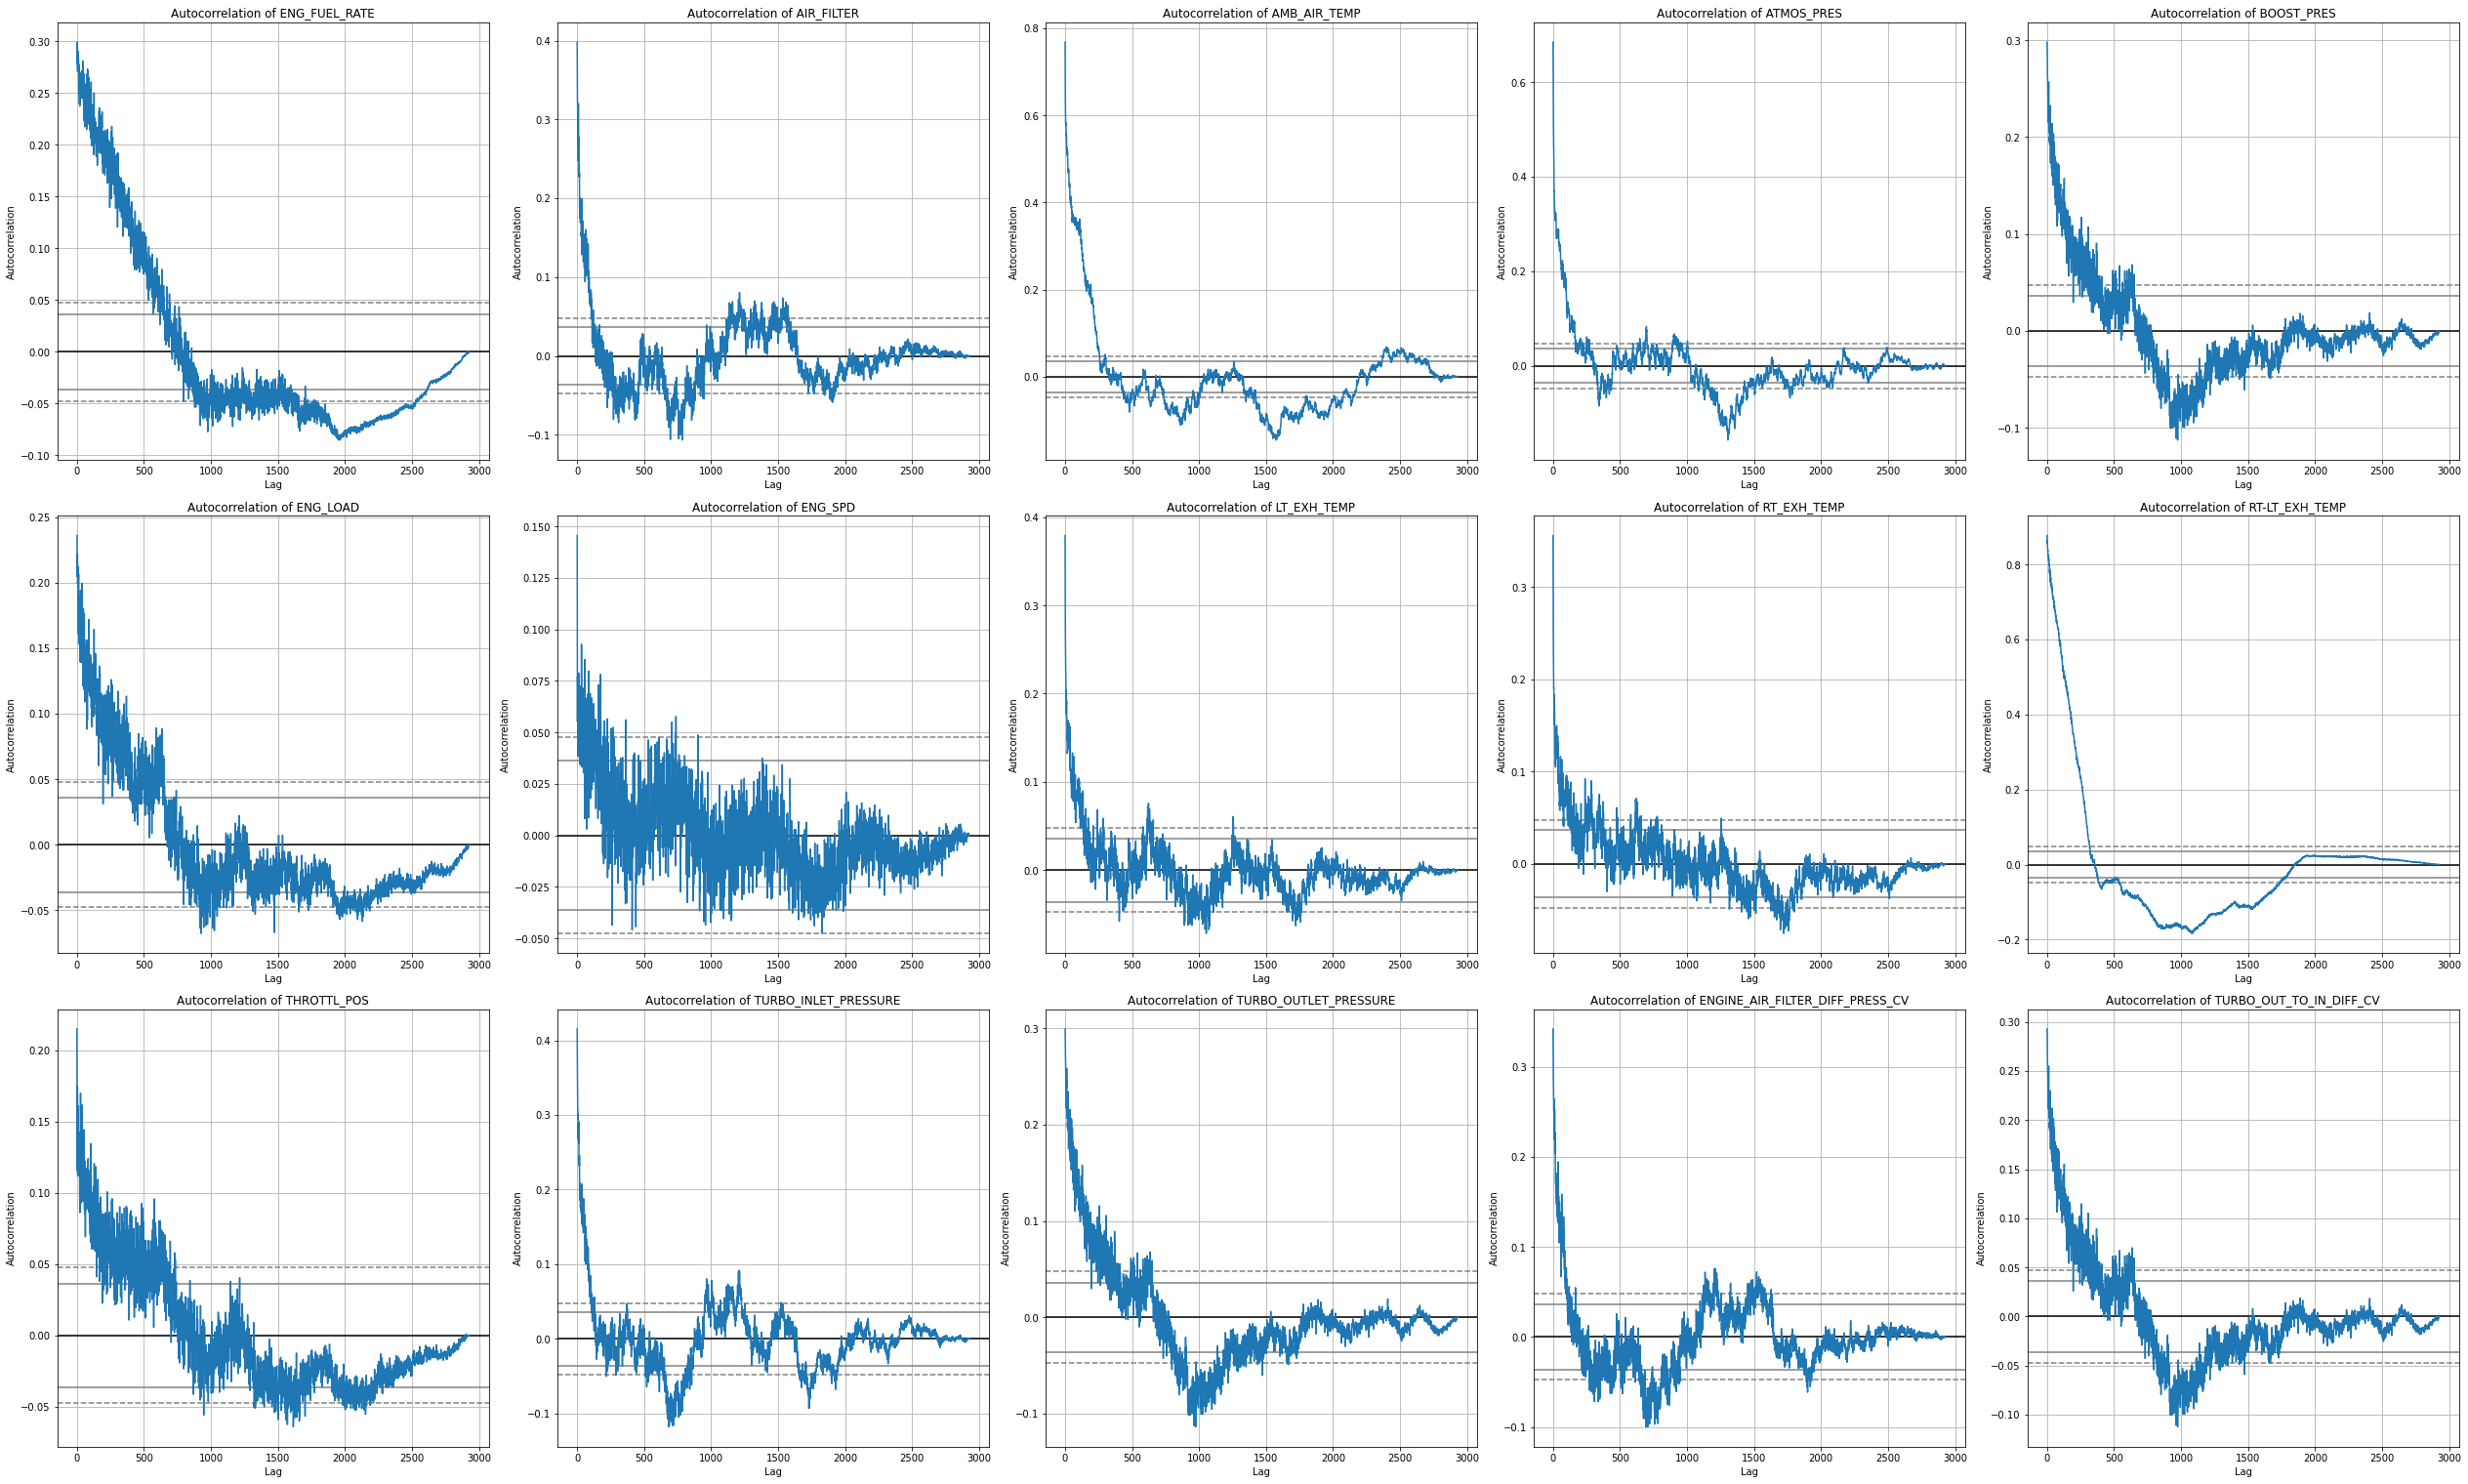

In [143]:
num_plots = len(df.columns)
total_cols = 5
total_rows = num_plots // total_cols

fig, axs = plt.subplots(nrows=total_rows, ncols=total_cols,
                        figsize=(7*total_cols, 7*total_rows), constrained_layout=True)

for col, ax in zip(df.columns, axs.flatten()):
    pd.plotting.autocorrelation_plot(df[col], ax=ax)
    ax.set_title(f'Autocorrelation of {col}')

# Remove empty subplots
if len(df.columns) % total_cols:
    axs[-1, -1].remove()

plt.show()

In [145]:
from scipy.stats import zscore

# Calculate Z-scores 
z_scores = zscore(df)

# Define a threshold
threshold = 3

# Identify outliers
outliers = np.abs(z_scores) > threshold

# Replace outliers with np.nan
df_nan = df.copy()
df_nan.values[outliers] = np.nan

In [146]:
df_roll = df_nan.copy()
df_roll[df_nan.isnull()] = df_nan.rolling(window=5, min_periods=1).mean()[df_nan.isnull()]